# Proyecto 1

Se nos pide resolver la ecuación del oscilador armónico amortiguado

\begin{align}
m \frac{d^2 x}{d t^2}+b \frac{d x}{d t}+k x=0
\tag{1}
\end{align}

De donde, tras discretizar las funciones, obtenemos

\begin{align}
a_i=-\frac{b}{m}v_i-\frac{k}{m}x_i
\tag{2}
\end{align}

Para ello usaremos las ecuaciones

\begin{align}
x_{i+1}=x_i+v_ih+\dfrac{a_i}{2}h^2
\tag{3}
\end{align}

\begin{align}
v_{i+1}=v_i+a_ih
\tag{4}
\end{align}

In [1]:
#Importamos los paquetes a utilizar
import numpy as np #Para el uso de arrays
import matplotlib.pyplot as plt #Para hacer gráficas

Declaramos las constantes que usaremos

In [2]:
x0=1.0 #Posición inicial
v0=0.0 #Velocidad inicial
k=4   #Constante de Elasticidad
m=0.5 #Masa
n=10000 #Número de puntos
tf=10 #Tiempo final
#Condicional que garantiza que el número de puntos sea impar
if n%2==0:
   n+=1
h=tf/n #Definimos el tiempo de cada intervalo

In [17]:
h

0.000999900009999

Establecemos el tiempo al que ocurre cada iteración, para ello definimos un array para el que cada elemento sea un múltiplo del tiempo de cada intervalo.

In [3]:
t=np.array([i*h for i in range(n)])

Definimos una función que resulte en la posición, velocidad y aceleración, para ciertas condiciones iniciales y para un determinado coeficiente de fricción.

In [4]:
def OsciladorAmortiguado(b,x0,v0):
    #Inicializamos los arrays de posición, velocidad y aceleración
    a=np.zeros(n)
    v=np.zeros(n)
    x=np.zeros(n)
    #Establecemos las condiciones iniciales
    x[0]=x0
    v[0]=v0
    for i in range(n):
        #Usamos la ecuación 2
        a[i]=-b/m*v[i]-k/m*x[i]
        #Hallamos la velocidad y la posición siguiente
        #Como ya no hay elementos después del último, ya no se realiza este proceso
        if i!=n-1:
            #Usamos la ecuación 3
            x[i+1]=x[i]+v[i]*h+a[i]*h**2/2
            #Usamos la ecuación 4
            v[i+1]=v[i]+a[i]*h
    return x,v,a

La energía se calcula por:
\begin{equation}
E=b\int_0^{t_{final}}v^2(t)dt
\tag{5}
\end{equation}

Usaremos la fórmula de Simpson, por lo que aproximaremos a E como

\begin{equation}
E=b\left(\frac{h}{3}\left[v^{2}(0)+4v^{2}(h)+2v^{2}(2h)+\cdots+4v^{2}((n-2)h)+v^{2}((n-1)h)\right]\right)
\tag{6}
\end{equation}

In [5]:
# Definimos una función en base a la ecuación 6
def Edis(v,b,ti):
    #Inicializamos la integral con los valores que no tienen factor
    integral=v[0]**2+v[-1]**2
    #Establecemos el índice del tiempo hasta el que queremos integrar
    ni=int(n*ti/tf)
    for i in range(1,ni):
        if i%2!=0:
            factor=4.0 # Factor para los índices impares
        else:
            factor=2.0 # Factor para los índices pares
        integral=integral+factor*v[i]**2
    return b*integral*h/3,t[ni] #Devuelve el valor de la integral y el tiempo hasta el que se calculó

In [6]:
x_b001,v_b001,a_b001=OsciladorAmortiguado(0.01,x0,v0) #Posición, velocidad y aceleración para b=0.01
x_b05,v_b05,a_b05=OsciladorAmortiguado(0.5,x0,v0) #Posición, velocidad y aceleración para b=0.5
x_b2,v_b2,a_b2=OsciladorAmortiguado(2.0,x0,v0)    #Posición, velocidad y aceleración para b=2.0
x_b3,v_b3,a_b3=OsciladorAmortiguado(3.0,x0,v0)    #Posición, velocidad y aceleración para b=3.0
x_b10,v_b10,a_b10=OsciladorAmortiguado(10.0,x0,v0)    #Posición, velocidad y aceleración para b=10.0

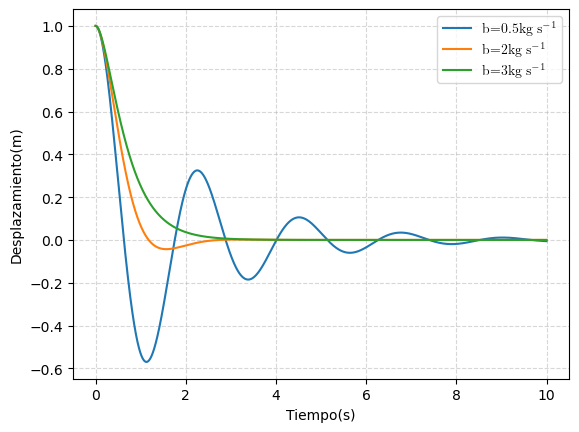

In [7]:
#Gráfica de la posición para los 3 coeficientes de fricción
fig,ax=plt.subplots()
#Establece la fuente de texto en formato de latex 
#Para usarlo se debe compilar dos veces la primera vez
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
#Ploteo de gráficas
plt.plot(t,x_b05,label="b=0.5kg s$^{-1}$")
plt.plot(t,x_b2,label="b=2kg s$^{-1}$")
plt.plot(t,x_b3,label="b=3kg s$^{-1}$")
plt.grid(linestyle="--",alpha=0.5)
#Títulos de los ejes
plt.ylabel("Desplazamiento(m)")
plt.xlabel("Tiempo(s)")
#Muestra la leyenda
plt.legend()
#Guarda la figura
plt.savefig("x_bvar.pdf")

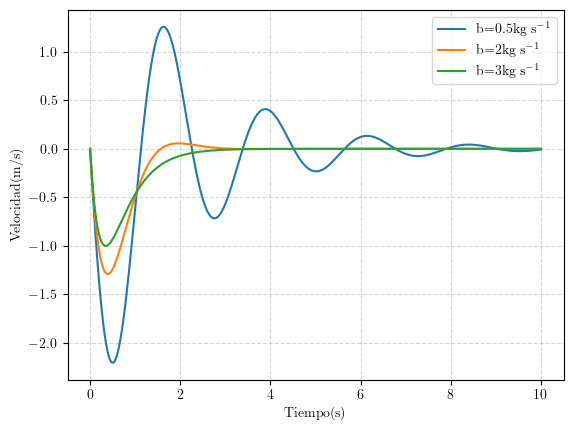

In [8]:
#Gráfica de la velocidad para los 3 coeficientes de fricción
fig,ax=plt.subplots()
#Establece la fuente de texto en formato de latex 
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
#Ploteo de gráficas
plt.plot(t,v_b05,label="b=0.5kg s$^{-1}$")
plt.plot(t,v_b2,label="b=2kg s$^{-1}$")
plt.plot(t,v_b3,label="b=3kg s$^{-1}$")
plt.grid(linestyle="--",alpha=0.5)
#Títulos de los ejes
plt.ylabel("Velocidad(m/s)")
plt.xlabel("Tiempo(s)")
#Muestra la leyenda
plt.legend()
#Guarda la figura
plt.savefig("v_bvar.pdf")

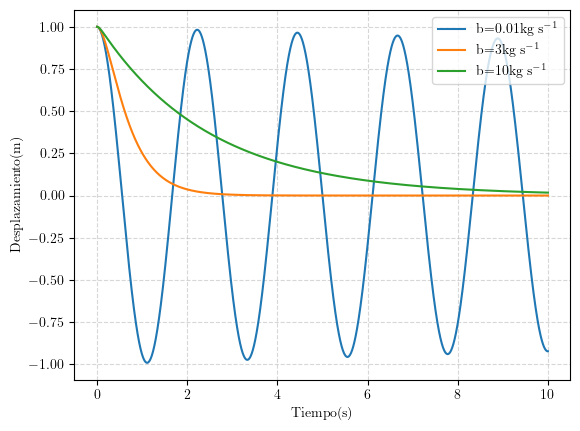

In [9]:
#Gráfica de la posición para los 3 coeficientes de fricción
fig,ax=plt.subplots()
#Establece la fuente de texto en formato de latex 
#Para usarlo se debe compilar dos veces la primera vez
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
#Ploteo de gráficas
plt.plot(t,x_b001,label="b=0.01kg s$^{-1}$")
plt.plot(t,x_b3,label="b=3kg s$^{-1}$")
plt.plot(t,x_b10,label="b=10kg s$^{-1}$")
plt.grid(linestyle="--",alpha=0.5)
#Títulos de los ejes
plt.ylabel("Desplazamiento(m)")
plt.xlabel("Tiempo(s)")
#Muestra la leyenda
plt.legend()
#Guarda la figura
plt.savefig("x_bvarext.pdf")

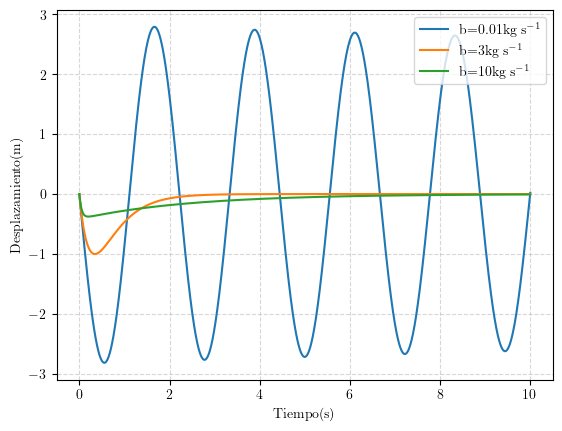

In [10]:
#Gráfica de la posición para los 3 coeficientes de fricción
fig,ax=plt.subplots()
#Establece la fuente de texto en formato de latex 
#Para usarlo se debe compilar dos veces la primera vez
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
#Ploteo de gráficas
plt.plot(t,v_b001,label="b=0.01kg s$^{-1}$")
plt.plot(t,v_b3,label="b=3kg s$^{-1}$")
plt.plot(t,v_b10,label="b=10kg s$^{-1}$")
plt.grid(linestyle="--",alpha=0.5)
#Títulos de los ejes
plt.ylabel("Desplazamiento(m)")
plt.xlabel("Tiempo(s)")
#Muestra la leyenda
plt.legend()
#Guarda la figura
plt.savefig("v_bvarext.pdf")

In [11]:
#Establecemos los tiempos para los que calcularemos la energía disipada
tint=np.array([1.0,2.0,5.0])
p=tint.size#Tamaño de los arrays
E_b05=np.zeros(p)
tnum=np.zeros(p)
print("b=0.5:")
for i in range(p):
    #Para cada tiempo se guarda la energía y el tiempo de integración
    E_b05[i],tnum[i]=Edis(v_b05,0.5,tint[i])
    print("Tiempo de integración numérica(s):",tnum[i], "\t Energía(J):", E_b05[i])

b=0.5:
Tiempo de integración numérica(s): 0.9999000099990001 	 Energía(J): 1.347649843681549
Tiempo de integración numérica(s): 1.9998000199980002 	 Energía(J): 1.7751905098774348
Tiempo de integración numérica(s): 4.999500049995 	 Energía(J): 1.9923852801371849


In [12]:
E_b2=np.zeros(p)
tnum=np.zeros(p)
print("b=2:")
for i in range(p):
    E_b2[i],tnum[i]=Edis(v_b2,2,tint[i]) #Se cambia la velocidad y el coeficiente de fricción
    print("Tiempo de integración numérica(s):",tnum[i], "\t Energía(J):", E_b2[i])

b=2:
Tiempo de integración numérica(s): 0.9999000099990001 	 Energía(J): 1.9327275070027607
Tiempo de integración numérica(s): 1.9998000199980002 	 Energía(J): 1.9999094825580215
Tiempo de integración numérica(s): 4.999500049995 	 Energía(J): 2.0020058026131435


In [13]:
E_b3=np.zeros(p)
tnum=np.zeros(p)
print("b=3:")
for i in range(p):
    E_b3[i],tnum[i]=Edis(v_b3,3,tint[i]) #Se cambia la velocidad y el coeficiente de fricción
    print("Tiempo de integración numérica(s):",tnum[i], "\t Energía(J):", E_b3[i])

b=3:
Tiempo de integración numérica(s): 0.9999000099990001 	 Energía(J): 1.8194244814987337
Tiempo de integración numérica(s): 1.9998000199980002 	 Energía(J): 1.9974098755913998
Tiempo de integración numérica(s): 4.999500049995 	 Energía(J): 2.0013380782357704


In [14]:
E_b001=np.zeros(p)
tnum=np.zeros(p)
print("b=0.01:")
for i in range(p):
    E_b001[i],tnum[i]=Edis(v_b001,0.01,tint[i]) #Se cambia la velocidad y el coeficiente de fricción
    print("Tiempo de integración numérica(s):",tnum[i], "\t Energía(J):", E_b001[i])

b=0.01:
Tiempo de integración numérica(s): 0.9999000099990001 	 Energía(J): 0.04375423622950072
Tiempo de integración numérica(s): 1.9998000199980002 	 Energía(J): 0.08521154147497674
Tiempo de integración numérica(s): 4.999500049995 	 Energía(J): 0.19217727250890385


In [15]:
E_b10=np.zeros(p)
tnum=np.zeros(p)
print("b=10:")
for i in range(p):
    E_b10[i],tnum[i]=Edis(v_b10,10,tint[i]) #Se cambia la velocidad y el coeficiente de fricción
    print("Tiempo de integración numérica(s):",tnum[i], "\t Energía(J):", E_b10[i])

b=10:
Tiempo de integración numérica(s): 0.9999000099990001 	 Energía(J): 1.0594363645544487
Tiempo de integración numérica(s): 1.9998000199980002 	 Energía(J): 1.58455604328969
Tiempo de integración numérica(s): 4.999500049995 	 Energía(J): 1.964510819500477
